In [27]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at D:\Dropbox\31_Projekte\01_Python\libs
Start Time: 20:27:14


time: 429 ms


# Create Random Data for Testing
* `random_series`: Returns a series of random data of several types, including names, random walks with perlin-noise and errorprone series to test your functions.
* `decorate`: Decorates a series with specials (e.g. NaNs)
* `people` and `random_numbers`: Random data for testing.

In [28]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import pandasklar as pak 
import random
#pak.Config.set('VERBOSE', False)

time: 340 ms


## random_series()

In [29]:
?pak.random_series

time: 339 ms


Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many decimal pl

### Simple

In [30]:
# i f s n c means int float string name choice
size = 100
i = pak.random_series( size, 'i')
f = pak.random_series( size, 'f')
s = pak.random_series( size, 's')
n = pak.random_series( size, 'n')
c = pak.random_series( size, 'c')
pak.dataframe( (i, f, s, n, c) )

,rnd_int,rnd_float,rnd_string,rnd_name,rnd_choice
0,411,0.169,Z5sbx,Anja,b
1,796,0.702,lÜsz,Marvin,c
2,167,0.978,aQörÜ,Paula,a
3,614,0.639,ia8UZRö,Else,d
4,199,0.334,9TnZ5jT,Tom,e
...,...,...,...,...,...
95,553,0.622,kju6Ök4,Bianca,c
96,970,0.478,ÖDZf6,Tina,c
97,615,0.362,i0ND,Claudia,c
98,635,0.540,ulMlV,Tim,c


time: 379 ms


### Random Numbers

In [31]:
# Several types of random numbers, with parameters
size = 100
i = pak.random_series( size, 'int',        min=-5, max=5,     p_nan=0.1,   p_dup=0    )
f = pak.random_series( size, 'float',      decimals=4,        p_nan=0.1,   p_dup=0    )                       
a = pak.random_series( size, 'ascending'                                              )
d = pak.random_series( size, 'descending'                                             )
p = pak.random_series( size, 'perlin',     freq=[2,1,8,1],                            )

# decorate f with 50% 0-values  
f = f.apply(pak.decorate, special=0, p=0.5)  

df = pak.dataframe( (i,f,a,d,p) )
pak.sample(df)

,rnd_int,rnd_float,rnd_ascending,rnd_descending,rnd_perlin
0,5,0.4989,0.000000,1.000000,0.000000
1,-2,0.8314,0.002646,0.999283,-0.073076
35,0,0.0000,0.545573,0.258802,0.338599
37,-1,0.0000,0.545609,0.234593,0.315491
71,0,0.9205,0.570372,0.158989,-0.545794
98,-1,0.7077,0.997997,0.003430,-0.036564
99,-5,0.0000,1.000000,0.000000,-0.021870


time: 444 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

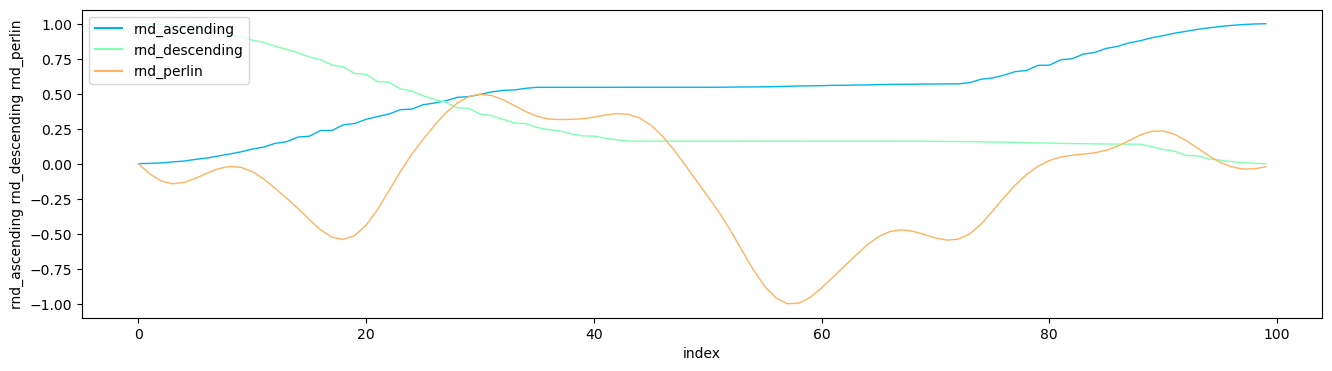

time: 2.1 s


In [32]:
# ascending, descending and perlin are ordered random sequences
%matplotlib inline
spalten = ['rnd_ascending','rnd_descending','rnd_perlin',]
pak.plot(df[spalten])

In [33]:
#pak.analyse_cols(df)

time: 352 ms


### Strings, names, lists and other types

In [34]:
# Strings, names, lists and other types, with parameters
size = 100
s = pak.random_series( size, 'string', len_min=2, len_max=20,           p_nan=0.2,   p_dup=0    )
n = pak.random_series( size, 'name',                                    p_nan=0.2,   p_dup=0.33 )
c = pak.random_series( size, 'choice', choice=['Bremen','Bremerhaven'], p_nan=0.3,   p_dup=0,    name='rnd_city')
l = pak.random_series( size, 'list',                                    p_nan=0.3,   p_dup=0.5  )
m = pak.random_series( size, 'mix',                                     p_nan=0.1,   p_dup=0    )
df = pak.dataframe( (s, n, c, l, m) )
pak.sample(df)

,rnd_string,rnd_name,rnd_city,rnd_list,rnd_mix
0,<NA>,Walther,NaN,"[Erna, Helena, John, Tom, Marianne, None]",{0}
1,aoi9,<NA>,NaN,NaN,NaN
7,ZEDBdg8ÖujZva,Sabine,Bremen,"[Tom, Manuela, Max, Günther, Tom, Heidi, Tanja]",-45849
37,V9abh,Torsten,Bremerhaven,"[Klaus, Jennifer, Johannes, Sara, Tanja, Niklas]",Olaf
56,qH,Chiara,Bremerhaven,"[Tom, Hendrik, Tom, Lennard, Anja, Anja, Jule,...",Hildegard
98,<NA>,<NA>,Bremerhaven,"[Anja, Walther, Vincent, Linda, Lara, Anette, ...",0.0401
99,sY1wIJpzXrOJu,Phillip,NaN,"[Christopher, Mario, Wilhelm, Sara, Andrea, Sa...",-45047


time: 617 ms


### Random progressions
Random progressions are `random_series` with typ `'ascending'`, `'descending'` or `'perlin'`.

In [35]:
# Some random progressions
size = 100
a = pak.random_series( size, random.choice([ 'a','d','p']))
b = pak.random_series( size, random.choice([ 'a','d','p']))
c = pak.random_series( size, random.choice([ 'a','d','p']))
d = pak.random_series( size, random.choice([ 'a','d','p']))
e = pak.random_series( size, random.choice([ 'a','d','p']))
f = pak.random_series( size, random.choice([ 'a','d','p']))
g = pak.random_series( size, random.choice([ 'a','d','p']))
h = pak.random_series( size, random.choice([ 'a','d','p']))
i = pak.random_series( size, random.choice([ 'a','d','p']))
j = pak.random_series( size, random.choice([ 'a','d','p']))
df = pak.dataframe( (a,b,c,d,e,f,g,h,i,j) )
df.head(3)

,A,B,C,D,E,F,G,H,I,J
0,0.000000,0.000000,0.000000,0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,0.000873,0.050416,0.009159,0,0.010815,0.996206,0.006150,0.999401,0.115766,0.002466
2,0.005816,0.080226,0.009503,0,0.011014,0.993875,0.012446,0.994026,0.252971,0.012410


time: 683 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

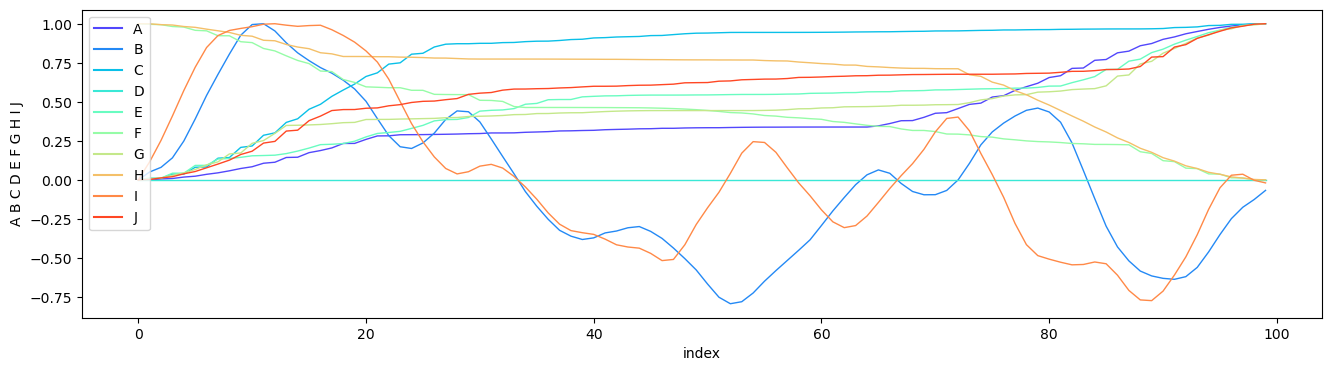

time: 4.34 s


In [36]:
%matplotlib inline
pak.plot(df)

### Random Scaling 
* use scale(), see "Scale Numbers"

min = 4512.458884092197
max = 77794.46791301532


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

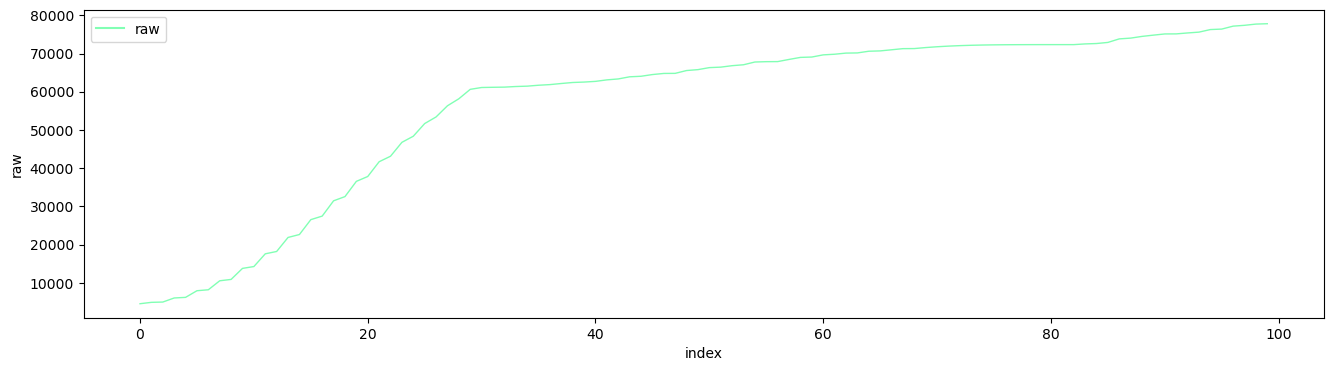

time: 1.61 s


In [66]:
s = pak.random_series(100, 'a') 
s = pak.scale(raw, 'random')   

print(  'min =', s.min() )
print(  'max =', s.max() )

%matplotlib inline
pak.plot(s)

### Random Error-prone Series
'errorprone' generates sequences of NaNs, 0, 1 with similar index.
Useful for testing. 

In [82]:
# try this sereral times
pak.random_series( 7, 'errorprone')  

42    None
42    None
42    None
42    None
42    None
42    None
42    None
Name: rnd_errorprone_3i9, dtype: object

time: 351 ms


## random_perlin()
You can access random perlin noise by the function `random_series` with `typ='perlin'`
of by the function `random_perlin`.

In [38]:
?pak.random_perlin

time: 392 ms


Signature: pak.random_perlin(shape=(100, 5), freq=[3, 6, 12, 24], op='add')
Docstring:
Returns a Dataframe with Perlin Noise:
- Every column looks like a random walk.
- The columns correlate (the noise is 2-dim)
* shape: The shape of the result
* freq:  Up to 4 frequencies for the random walk.
         The frequencies are added or multipied with descending factors 1, 1/2, 1/4 and 1/16.
         A frequency of 1 means 1 maximum and 1 minimum.
         A frequency of 2 means 2 maxima  and 2 minima.                
         A frequency of 0 means, that nothing is added for the corresponding factor.
         E.g. freq=[1,0,0,100] gives a very low-frequency random walk 
         with a very slight admixture of high-frequency components. 
* op:    'add' or 'mult', how the frequencies are linked together
            
File:      d:\dropbox\31_projekte\01_python\git\pandasklar\src\pandasklar\content.py
Type:      function


In [39]:
# default perlin
df = pak.random_perlin( shape=(100,15) )
df.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,0.000000,0.080060,-0.029532,-0.164274,-0.286807,0.000000,0.223605,0.226050,0.164624,0.196357,0.000000,-0.004291,0.177066,0.114821,-0.037543
1,-0.004288,0.074246,-0.012511,-0.147175,-0.309610,-0.064028,0.186672,0.229139,0.190045,0.205144,0.020570,0.029434,0.174468,0.115354,-0.013550
2,-0.022051,0.055342,0.002213,-0.144487,-0.316331,-0.113914,0.148808,0.226920,0.201328,0.219611,0.035681,0.080613,0.185466,0.141270,0.004557
3,-0.035671,0.048433,0.017711,-0.159505,-0.318663,-0.146355,0.115352,0.216222,0.194593,0.223334,0.049662,0.132119,0.215520,0.180185,0.016562
4,-0.024960,0.067394,0.032892,-0.181652,-0.327113,-0.165607,0.080143,0.209840,0.188740,0.209005,0.066170,0.167380,0.245373,0.211455,0.024455


time: 644 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

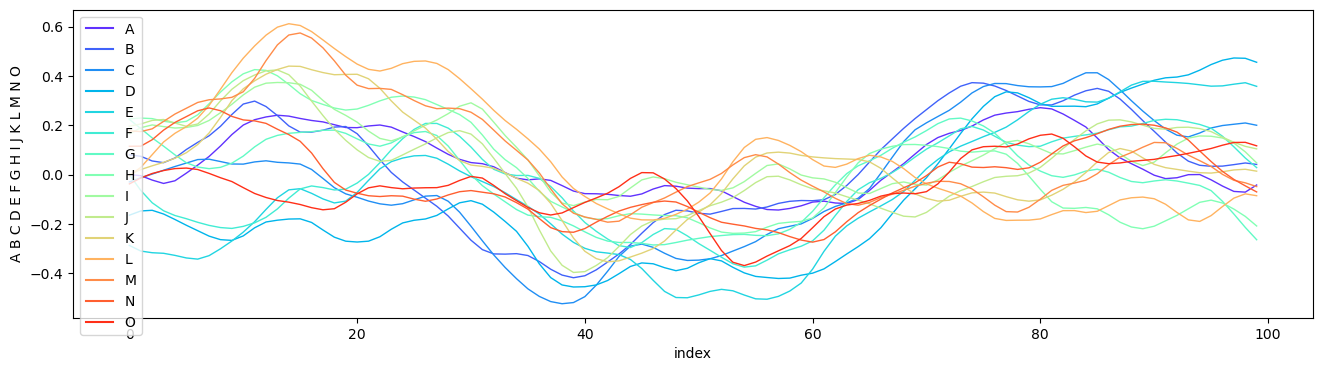

time: 5.07 s


In [40]:
%matplotlib inline
pak.plot(df)

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

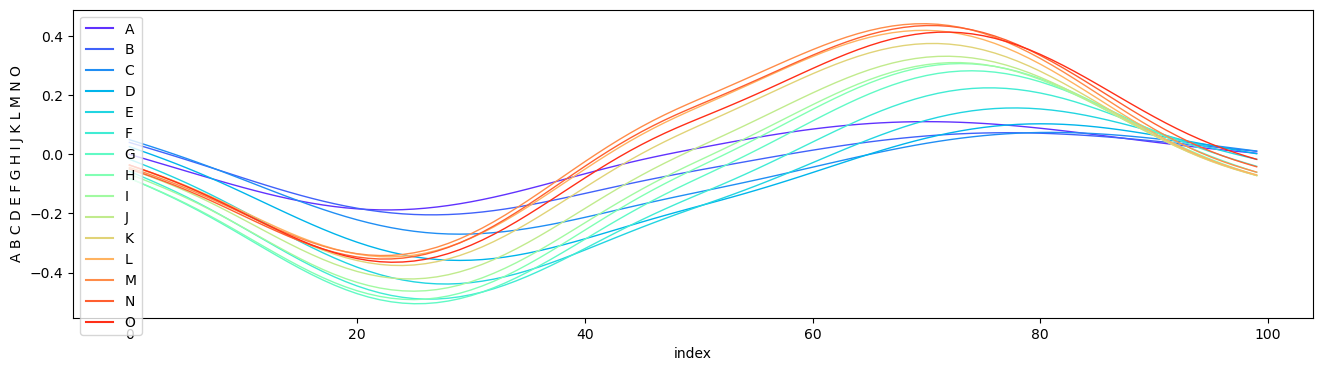

time: 5.38 s


In [41]:
# freq 2 means: 2 minima and 2 maxima
df = pak.random_perlin( shape=(100,15), freq=2 )
pak.plot(df)

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

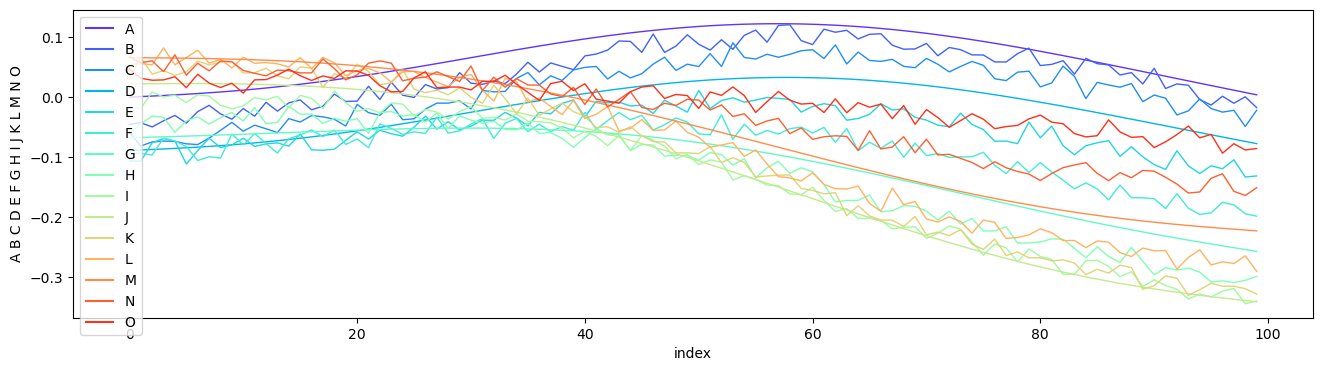

time: 5.61 s


In [42]:
# freq 1 added to a little bit freq 100
df = pak.random_perlin( shape=(100,15), freq=[1,0,0,100] )
pak.plot(df, x='index')

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

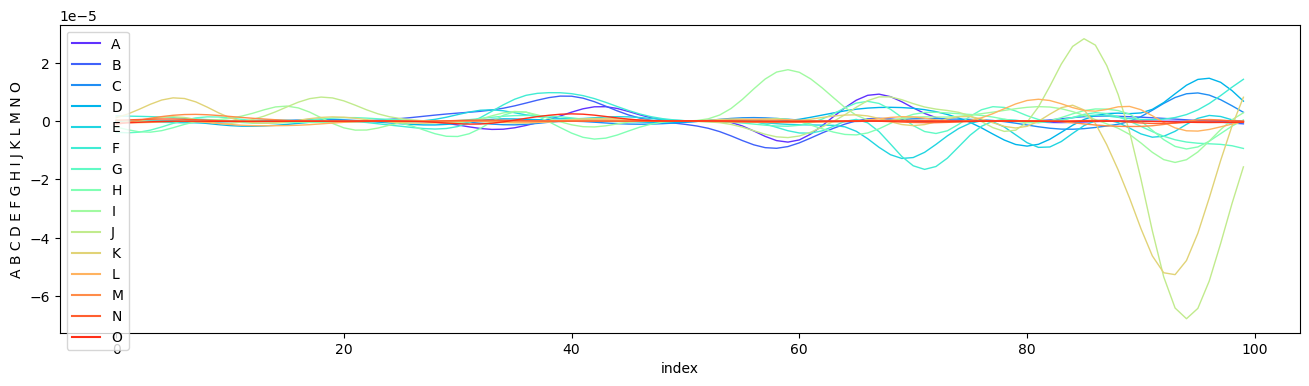

time: 6.68 s


In [43]:
df = pak.random_perlin( shape=(100,15), freq=[1,1,4,8], op='mult')
pak.plot(df, x='index')

## decorate()

In [44]:
?pak.decorate

time: 333 ms


Signature: pak.decorate(skalar, p=0.2, special=nan)
Docstring:
Decorates a series with specials (e.g. NaNs), is applied with apply
e.g. result = result.apply(decorate, p=0.1)               # decorate with 10% nan  
e.g. result = result.apply(decorate, p=0.1, special='a')  # decorate with 10% 'a'.              
File:      d:\dropbox\31_projekte\01_python\git\pandasklar\src\pandasklar\content.py
Type:      function


In [45]:
df = pak.dataframe( [ list('Babykorb'), 
                      list('abfällig'), 
                      list('Abgründe'), 
                      list('Kätzchen'), 
                      list('Landwirt'), 
                      list('lebendig'), 
                      list('Saugrohr'),       
                      list('Trugbild'),                     
                ] )
df['B'] = df.B.apply( pak.decorate, p=0.2, special='😀')
df['H'] = df.H.apply( pak.decorate, p=0.2)
df

,A,B,C,D,E,F,G,H
0,B,a,b,y,k,o,r,b
1,a,b,f,ä,l,l,i,NaN
2,A,b,g,r,ü,n,d,e
3,K,😀,t,z,c,h,e,n
4,L,😀,n,d,w,i,r,t
5,l,e,b,e,n,d,i,g
6,S,a,u,g,r,o,h,r
7,T,r,u,g,b,i,l,d


time: 364 ms


## people(): Easy Random Data

In [46]:
?pak.people

time: 507 ms


Signature: pak.people(size=100)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      d:\dropbox\31_projekte\01_python\git\pandasklar\src\pandasklar\content.py
Type:      function


In [47]:
# Test data
df = pak.people()
pak.sample(df)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Mike,30,30,50740,Berlin,n9yIüuTRaX,"{L, d}","[A, B, C, C]"
1,Jule,33,30,56585,Bremen,7Jl0tJVU,"{J, q, v}","[A, C, C, B]"
24,Edith,33,30,39686,Bremen,ZczDdn,"{L, l}","[A, B, C]"
70,Gustav,36,30,64225,Bremen,M5oüewq,"{X, Y, a, q, h}","[A, C, C, B]"
73,Julian,35,30,70946,Berlin,neqKlYBkRi,{Z},"[A, x]"
98,Sven,24,20,15465,<NA>,a1MKüu,"{u, y, W, x, 2}","[A, C, C, B]"
99,Michael,29,20,52816,Berlin,xWlBIfnLma,"{G, l, s, S, h}","[A, A, A]"


time: 534 ms


In [48]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_hashable,nan_allowed,mem_usage,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int8,True,False,True,False,800.0 B,1,100,0,0,100,0.0,49.50,49.5,99.0,4950.0
1,first_name,str,pd.string,string,,False,True,True,True,6.1 KB,1,70,0,30,100,Angelika,NaN,NaN,Yannick,NaN
2,age,int8,pd.Int8,Int8,,True,False,True,True,200.0 B,1,21,0,79,100,20.0,30.96,32.0,40.0,3096.0
3,age_class,int8,pd.Int8,Int8,,True,False,True,True,200.0 B,1,3,0,97,100,20.0,26.50,30.0,40.0,2650.0
4,postal_code,int32,pd.Int32,Int32,,True,False,True,True,500.0 B,1,69,1,30,100,11666.0,53819.12,54618.0,98624.0,5328093.0
5,birthplace,str,pd.string,string,,False,True,True,True,5.4 KB,1,2,33,65,100,Berlin,NaN,NaN,Bremen,NaN
6,secret,str,pd.string,string,,False,True,True,True,8.0 KB,1,100,0,0,100,04PtSlu9ö,NaN,NaN,öÜ2Lq,NaN
7,features,set,object,object,,False,True,False,True,27.3 KB,1,80,0,20,100,{},NaN,NaN,"{G, l, s, S, h}",NaN
8,history,list,object,object,,False,True,False,True,6.9 KB,1,9,0,91,100,[],NaN,NaN,"[c, b, a]",NaN


time: 413 ms


## random_numbers()

In [49]:
?pak.random_numbers

time: 603 ms


Signature: pak.random_numbers(size=1000)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      d:\dropbox\31_projekte\01_python\git\pandasklar\src\pandasklar\content.py
Type:      function


In [50]:
# Test data
df = pak.random_numbers()
pak.sample(df)

,A,B,C,D,E
0,40,56671,0.162,8.90,0.000000
1,25,85648,0.672,7.45,0.000042
130,41,99632,0.628,1.23,0.246649
441,28,56223,0.283,5.46,0.853978
536,34,44071,0.895,0.61,0.882518
998,32,12898,0.291,3.83,0.999980
999,32,49683,0.392,4.16,1.000000


time: 583 ms


In [51]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_hashable,nan_allowed,mem_usage,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int16,True,False,True,False,7.8 KB,1,1000,0,0,1000,0.00,499.50,499.50,999.00,499500.00
1,A,int8,pd.Int8,Int8,,True,False,True,True,2.0 KB,1,23,0,977,1000,20.00,30.83,31.00,42.00,30833.00
2,B,int32,pd.Int32,Int32,,True,False,True,True,4.9 KB,1,700,0,300,1000,10031.00,54917.29,54839.50,99881.00,54917286.00
3,C,float32,np.float32,float32,,True,False,True,True,3.9 KB,1,700,0,300,1000,0.00,0.49,0.48,1.00,488.64
4,D,float32,np.float32,float32,,True,False,True,True,3.9 KB,1,700,0,300,1000,0.01,4.84,4.71,9.99,4835.00
5,E,float32,np.float32,float32,,True,False,True,True,3.9 KB,1,994,0,6,1000,0.00,0.73,0.87,1.00,731.80


time: 447 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

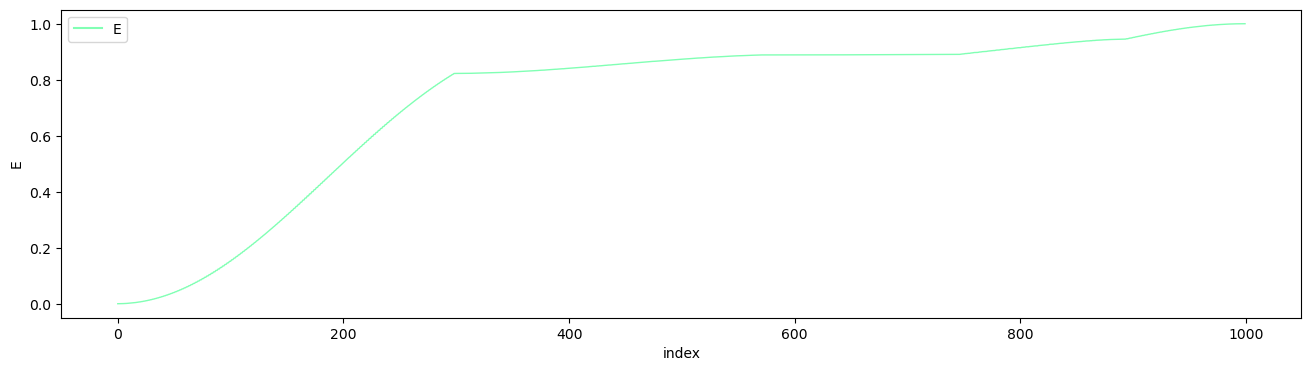

time: 2.51 s


In [52]:
pak.plot(df.E)